In [1]:
# Import depandants
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt

# SQL Alchemy
from sqlalchemy import create_engine

# Import password
from get_pass import password

In [2]:
conn = psycopg2.connect(
    host="localhost",
    database="sql-challenge",
    user="postgres",
    password=password)

In [3]:
# Query All Records in the the salary table
salary_data = pd.read_sql("SELECT * FROM salaries", conn)

In [4]:
# Convert the salary column to a float
salary_data[salary_data.columns[1:]] = salary_data[salary_data.columns[1:]].replace('[\$,]', '', regex=True).astype(float)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026B14ACEA08>]],
      dtype=object)

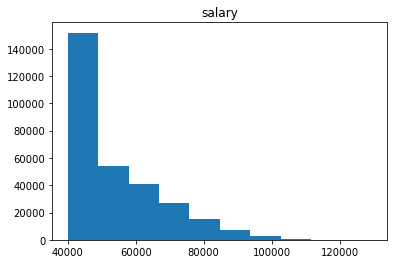

In [5]:
# Create histogram of salaries
salary_data.hist(column="salary", grid=False, bins=10)

In [6]:
# Read in tables to be joined
employee_data = pd.read_sql("SELECT * FROM employee", conn)
title_data = pd.read_sql("SELECT * FROM titles", conn)

In [7]:
# joining salary table and employee table as a temp df
temp_join_df = pd.merge(salary_data, employee_data, how="left", on=["empl_id", "empl_id"])

# joining temp df and title df as final df
final_merge_df = pd.merge(temp_join_df, title_data, how="left", on=["title_id", "title_id"])

In [8]:
# Dropping irrelevant coulmns
salary_title_df = final_merge_df[["salary","title"]]

# group the df by title
salary_title_df_grouped = salary_title_df.groupby("title")

# define a series using the grouped df's mean of salary
salary_title_df_grouped_mean = salary_title_df_grouped["salary"].mean()

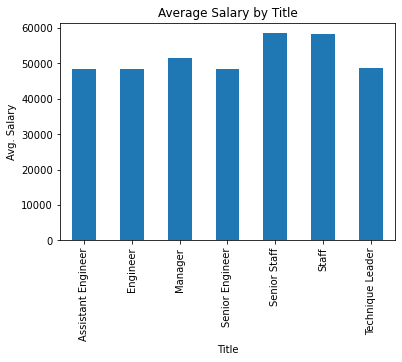

In [9]:
# Create bar chart to show the average salary by title
salary_title_df_grouped_mean.plot.bar()

# Give the chart a title, x label, and y label
plt.ylabel("Avg. Salary")
plt.xlabel("Title")
plt.title("Average Salary by Title")

# Show the chart
plt.show()